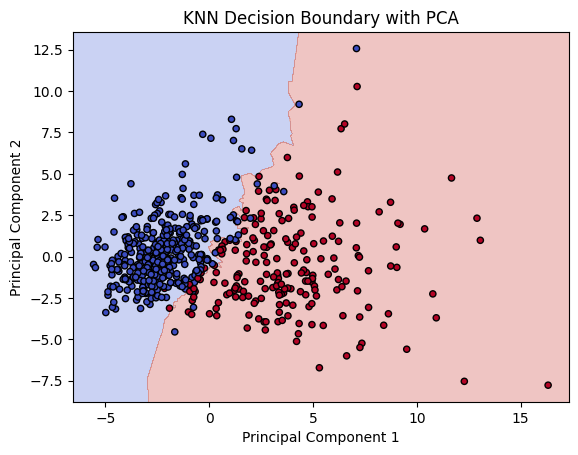

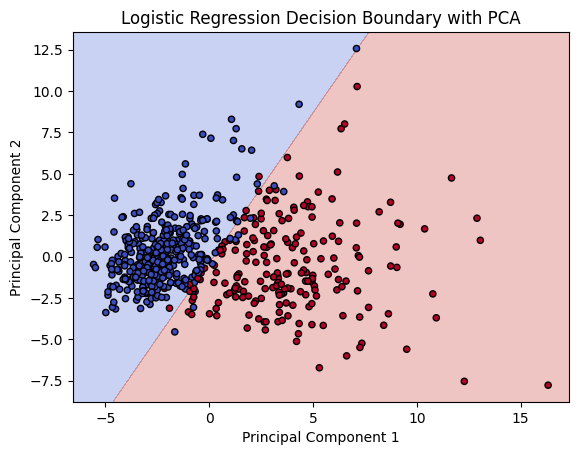

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

# Drop irrelevant columns and preprocess
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
features = df.drop(columns=['diagnosis'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['diagnosis'], test_size=0.2, random_state=42)

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

# Fit KNN and Logistic Regression models on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca, df['diagnosis'])

logreg_pca = LogisticRegression(max_iter=10000)
logreg_pca.fit(X_pca, df['diagnosis'])

def plot_decision_boundary(clf, X, y, title):
    # Create a mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Plot decision boundaries
plot_decision_boundary(knn_pca, X_pca, df['diagnosis'], 'KNN Decision Boundary with PCA')
plot_decision_boundary(logreg_pca, X_pca, df['diagnosis'], 'Logistic Regression Decision Boundary with PCA')
